In [381]:
import json
import requests
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import plotly
import plotly.express as px 
from pandas.io.json import json_normalize
from IPython.display import HTML
import plotly.graph_objects as go
import plotly.offline as pyo
plotly.offline.init_notebook_mode(connected=True)
from hurst import compute_Hc, random_walk
import quandl as qdl
from scipy.stats import linregress
import trendln

In [5]:
#getting Latest Listings data from Coinmarketcap
global_url="https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?start=1&limit=6&convert=USD&CMC_PRO_API_KEY=YOURAPIKEY"

In [6]:
request = requests.get(global_url).json()

In [7]:
print(json.dumps(request,sort_keys=True,indent=4))

{
    "data": [
        {
            "circulating_supply": 18465656,
            "cmc_rank": 1,
            "date_added": "2013-04-28T00:00:00.000Z",
            "id": 1,
            "last_updated": "2020-08-20T05:16:37.000Z",
            "max_supply": 21000000,
            "name": "Bitcoin",
            "num_market_pairs": 8743,
            "platform": null,
            "quote": {
                "USD": {
                    "last_updated": "2020-08-20T05:16:37.000Z",
                    "market_cap": 216360318842.9134,
                    "percent_change_1h": -0.136197,
                    "percent_change_24h": -0.719832,
                    "percent_change_7d": 1.49975,
                    "price": 11716.9040105,
                    "volume_24h": 22693100749.0254
                }
            },
            "slug": "bitcoin",
            "symbol": "BTC",
            "tags": [
                "mineable",
                "sha-256",
                "state-channels",
                "p

In [316]:
data=request['data']

In [317]:
#flattening nested json in pandas
cryptodf=json_normalize(data)

In [319]:
cryptodf=cryptodf.rename(columns={'quote.USD.market_cap':'USD_marketcap','quote.USD.percent_change_24h':'pct_change_24h'})

In [320]:
#adding thousand separators to USD_marketcap
cryptodf['USD_marketcap']=cryptodf['USD_marketcap'].astype('int64').apply(lambda x : "{:,}".format(x))

In [321]:
total_marketcap = 363062190913

In [322]:
cryptodf.loc[6]=[2,'Other','Other','Other','0','0','0','0','0','0','0','0','0','0','0','0','0','0',67354630157.27734,'0','0','0','0','0','0']

# Top cryptocurrencies by market cap as of 08/19/2020




In [130]:
cryptodf[['name','USD_marketcap','pct_change_24h']].style.hide_index()

name,USD_marketcap,pct_change_24h
Bitcoin,"216,360,318,842",-0.719832
Ethereum,"45,354,964,822",-2.19663
XRP,"12,912,780,897",-1.75
Tether,"10,023,716,234",-0.173883
Chainlink,"5,687,116,102",5.06737
Bitcoin Cash,"5,368,663,855",-2.23343
Other,"67,354,630,157",0


In [132]:
fig=px.pie(cryptodf,values=marketcap ,names=cryptodf.name,title='Top Cryptocurrencies by Market Cap')
fig.show()

# YFI  

A DeFi governance token, Yearn.finance ($YFI), has had an explosive growth in the past month. Let's analyze it's time series data from 08/01/20 to 08/20/20.

In [89]:
#getting 5min OHLC YFI historical data from coinapi.io from 08/01/2020 to 08/20/2020
limit = '10000'
url = f'https://rest.coinapi.io/v1/ohlcv/YFI/USD/history?period_id=5MIN&time_start=2020-08-01T00:00:00&limit={limit}'
headers = {'X-CoinAPI-Key' : 'YOURAPIKEY'}
YFI_response = requests.get(url, headers=headers)

In [90]:
yfidata=YFI_response.json()

In [91]:

print(json.dumps(yfidata,sort_keys=True,indent=4))

[
    {
        "price_close": 4355.0,
        "price_high": 4355.0,
        "price_low": 4355.0,
        "price_open": 4355.0,
        "time_close": "2020-08-01T00:08:15.6117960Z",
        "time_open": "2020-08-01T00:08:15.6117960Z",
        "time_period_end": "2020-08-01T00:10:00.0000000Z",
        "time_period_start": "2020-08-01T00:05:00.0000000Z",
        "trades_count": 1,
        "volume_traded": 0.004
    },
    {
        "price_close": 4515.0,
        "price_high": 4515.0,
        "price_low": 4485.0,
        "price_open": 4485.0,
        "time_close": "2020-08-01T00:59:40.7926100Z",
        "time_open": "2020-08-01T00:56:21.5841960Z",
        "time_period_end": "2020-08-01T01:00:00.0000000Z",
        "time_period_start": "2020-08-01T00:55:00.0000000Z",
        "trades_count": 10,
        "volume_traded": 1.614
    },
    {
        "price_close": 4355.0,
        "price_high": 4355.0,
        "price_low": 4225.0,
        "price_open": 4350.0,
        "time_close": "2020-08-01T0

In [325]:
with open('yfi.json', 'w') as json_file:
    json.dump(yfidata, json_file)

In [333]:
#creating a pandas DataFrame from JSON
yfi_df = pd.read_json(YFI_response.text, orient='records', dtype={
    'time_close': np.datetime64,
    'time_open': np.datetime64,
    'time_period_end': np.datetime64,
    'time_period_start': np.datetime64,
})

In [334]:
yfi_df.head()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2020-08-01 00:05:00,2020-08-01 00:10:00,2020-08-01 00:08:15.611796,2020-08-01 00:08:15.611796,4355.0,4355.0,4355.0,4355.0,0.004,1
1,2020-08-01 00:55:00,2020-08-01 01:00:00,2020-08-01 00:56:21.584196,2020-08-01 00:59:40.792610,4485.0,4515.0,4485.0,4515.0,1.614,10
2,2020-08-01 01:10:00,2020-08-01 01:15:00,2020-08-01 01:13:05.453441,2020-08-01 01:13:18.364039,4350.0,4355.0,4225.0,4355.0,0.012,3
3,2020-08-01 01:55:00,2020-08-01 02:00:00,2020-08-01 01:59:02.318741,2020-08-01 01:59:36.694919,4485.0,4515.0,4220.0,4405.0,5.939,10
4,2020-08-01 02:00:00,2020-08-01 02:05:00,2020-08-01 02:00:53.388658,2020-08-01 02:00:53.879790,4485.0,4485.0,4485.0,4485.0,0.004,2


In [335]:
yfi_df.set_index('time_period_start',inplace=True)

In [400]:
#calculating daily log returns
yfi_df['returns']=np.log(yfi_df['price_close']/yfi_df['price_close'].shift(1))

In [403]:
#calculating rolling statistics
window = 20
yfi_df['min']=yfi_df['price_close'].rolling(window=window).min()
yfi_df['mean']=yfi_df['price_close'].rolling(window=window).mean()
yfi_df['max']=yfi_df['price_close'].rolling(window=window).max()
yfi_df['std']=yfi_df['price_close'].rolling(window=window).std()

## Returns 
The figure below visualizes a high variability of YFI returns over time. 

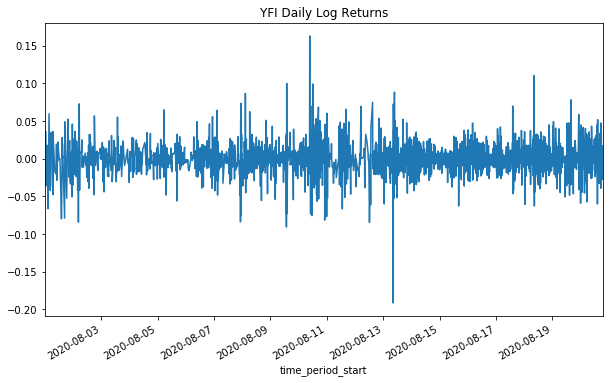

In [387]:
yfi_df['returns'].plot(figsize=(10,6),title = "YFI Daily Log Returns")

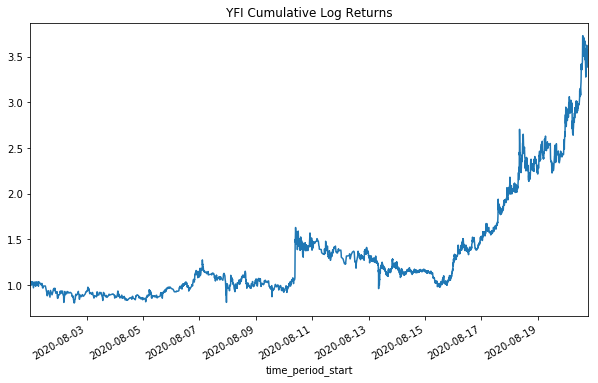

In [389]:
yfi_df['returns'].cumsum().apply(np.exp).plot(figsize=(10, 6),title="YFI Cumulative Log Returns")

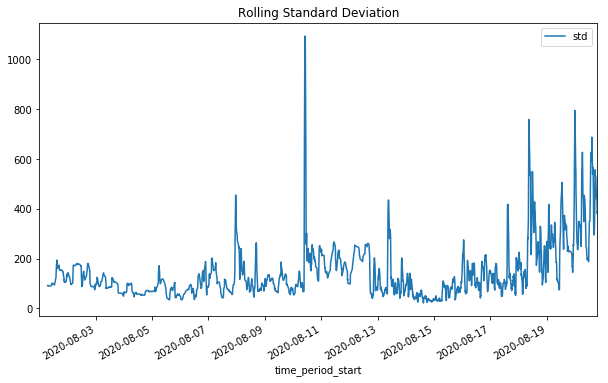

In [405]:
yfi_df[['std']].plot(figsize=(10, 6),title='Rolling Standard Deviation')

# Trend  


YFI appears to be in a Bull Momentum phase as indicated by a trend line in the figure below.

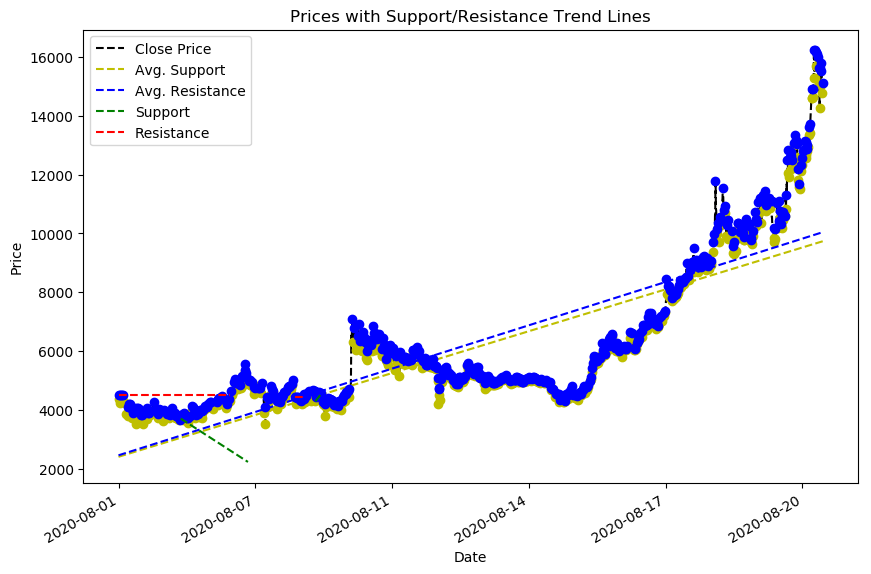

<Figure size 432x288 with 0 Axes>

In [406]:
figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='w')
fig = trendln.plot_sup_res_date(yfi_df.price_close, yfi_df.index, window=20, fromwindows = False)
plt.show()
plt.clf()

# Technical Analysis Example  
### Dual Moving Average Crossovers  

Let's use two simple moving averages to derive positions for a trading strategy. Setting short-term SMA to 14 days and long-term SMA to 49 days, we identify our crossover points. SMA day windows should be calibrated to identify a better fit. We go long on YFI when the short-term SMA1 is above the long-term SMA2 (position =1) and go short when SMA1 is below SMA2 (position=2.)

In [407]:
#Dual Moving average crossover. Short and long-term SMA statistics (14 and 49 days)
yfi_df['SMA1']=yfi_df['price_close'].rolling(window=14).mean()
yfi_df['SMA2']=yfi_df['price_close'].rolling(window=49).mean()

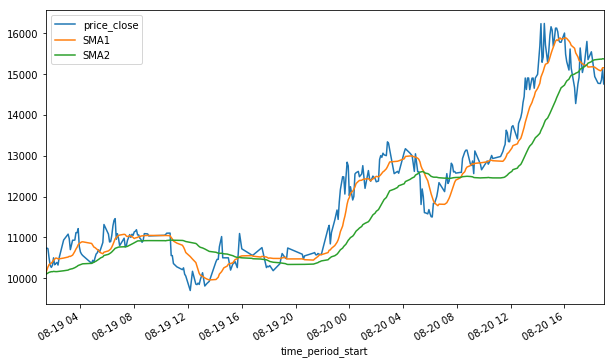

In [408]:
yfi_df[['price_close','SMA1','SMA2']].iloc[-300:].plot(figsize=(10,6))

### Trading Positions 
In the figure below, a value of 1 indicates a long position and a value of -1 indicates a short position. The positions are derived by a crossover of the two SMA lines. 

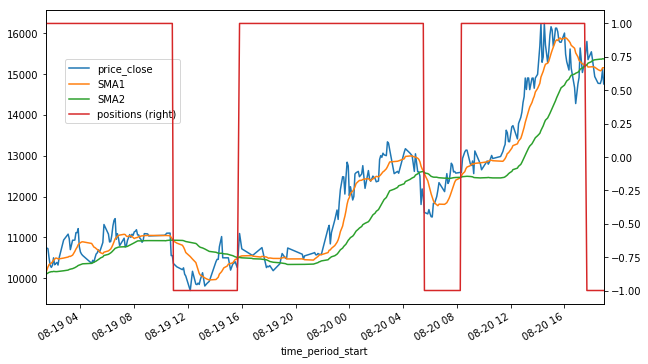

In [223]:
yfi_df['positions']=np.where(yfi_df['SMA1']> yfi_df['SMA2'],1,-1)
ax=yfi_df[['price_close','SMA1','SMA2','positions']].iloc[-300:].plot(figsize=(10,6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25,0.85));

# Random Walk, Mean Reversion or Momentum? 


How do we determine whether a time series data has a tendency to move in the direction it's trending or revert to it's mean?
A Hurst Exponent is one method to quantify the tendency.
YFI data has a Hurst exponent of <0.5, which indicates that a time series is mean reverting and creates opportunities for mean reversion trading strategies. Hurst should be tested on different time windows in order to get an accurate result.



In [251]:
#calculating Hurst exponent on log daily return
from hurst import compute_Hc, random_walk
s=yfi_df['returns'].dropna()
H, c, val = compute_Hc(s)

In [252]:
print(H)

0.29885034062972415


In [409]:
! jupyter nbconvert --to html YFI_data.ipynb

[NbConvertApp] Converting notebook YFI_data.ipynb to html
[NbConvertApp] Writing 2347645 bytes to YFI_data.html
